In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from nltk.cluster.util import cosine_distance
import networkx as nx

In [4]:
import nltk
nltk.download('stopwords')

import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = pd.read_csv(r'C:\Users\bhava\OneDrive\Documents\AMPBA\Capstone\Reviews\Raw Files\combinedReviews.csv')
data.head()

,skillDevelopment,reviewText,location,cons,salaryBenefits,workLifeBalance,pros,workSatisfaction,postedon,jobSecurity,careerGrowth,companyCulture,company,jobFunction,overallScore,file
0,1.0,Its good and managable only because of team.,Lucknow,Fake offers were given while recruiting. Wrong...,1.0,3.0,Only my collegues and work culture. There is n...,3.0,21-Apr-22,4.0,1.0,4.0,HCL Technologies,Hr Executive,1.0,hcl
1,4.0,Very balanced and rarely pressuring.,Noida,* Although it's WFH as of now but no general t...,2.0,5.0,Overall good experience for me! Very much secu...,4.0,16-Apr-22,5.0,4.0,3.0,HCL Technologies,Technical Lead,4.0,hcl
2,3.0,working hours are 9:30 hours no shift allowanc...,Greater Noida,Management always listen what the manager sayi...,2.0,3.0,Job security is there Client or Customer centr...,1.0,20-Apr-22,4.0,2.0,2.0,HCL Technologies,Senior Specialist,3.0,hcl
3,1.0,Too bad for a mid level experienced. Enquire p...,Chennai,Work culture is too bad and experienced so man...,1.0,2.0,It is a growing organization and has multiple ...,1.0,09-Dec-21,4.0,1.0,1.0,HCL Technologies,Senior Technical Lead,1.0,hcl
4,1.0,Is there anything called work life balance her...,Chennai,Why not paying your employees good!? .Stop ove...,4.0,1.0,"Hcl is avery good organization,But the middle ...",1.0,04-Mar-22,4.0,1.0,1.0,HCL Technologies,Software Engineer,1.0,hcl


In [6]:
data=data.reset_index()

In [7]:
def index_reset(df):
    df_reset=df.reset_index(drop=False)# for factor analysis to have a similar sl no of the data
    return(df_reset)

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bhava\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Extracting the desired variables for analysis
reviews = data[['company','overallScore','reviewText','cons','pros']]

## Selecting the numerical features

In [11]:
def selection(data):
    df=data[['skillDevelopment', 'salaryBenefits',
       'workLifeBalance',  'workSatisfaction', 
       'jobSecurity', 'careerGrowth', 'companyCulture']]

    df=df.dropna()
    return(df)
    

In [12]:
df=selection(data)
df.head()

,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture
0,1.0,1.0,3.0,3.0,4.0,1.0,4.0
1,4.0,2.0,5.0,4.0,5.0,4.0,3.0
2,3.0,2.0,3.0,1.0,4.0,2.0,2.0
3,1.0,1.0,2.0,1.0,4.0,1.0,1.0
4,1.0,4.0,1.0,1.0,4.0,1.0,1.0


## Factor analysis

In [13]:
!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer import FactorAnalyzer

In [14]:
df_reset=index_reset(df)
#df_reset=df.copy()

In [15]:
def factor(df_reset):
    fa = FactorAnalyzer(n_factors=3,rotation='oblimin')
    fa.fit(df_reset)
    df_factor_scores=pd.DataFrame(fa.transform(df_reset))
    df_reset[['exhaustion','Depersonalization','PersonalAccomplishment']]=df_factor_scores
    fa_data=df_reset
    return(fa_data)

In [16]:
final_df=factor(df_reset)

In [17]:
final_df

,index,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture,exhaustion,Depersonalization,PersonalAccomplishment
0,0,1.0,1.0,3.0,3.0,4.0,1.0,4.0,-1.324421,-0.505241,-1.554899
1,1,4.0,2.0,5.0,4.0,5.0,4.0,3.0,0.181301,0.346007,-0.825013
2,2,3.0,2.0,3.0,1.0,4.0,2.0,2.0,-1.320864,-1.101628,-0.827405
3,3,1.0,1.0,2.0,1.0,4.0,1.0,1.0,-2.050294,-1.772570,-1.557231
4,4,1.0,4.0,1.0,1.0,4.0,1.0,1.0,-1.859811,-2.083037,0.677617
...,...,...,...,...,...,...,...,...,...,...,...
96245,97092,4.0,3.0,5.0,4.0,5.0,3.0,4.0,0.077751,0.495958,-0.077544
96246,97093,4.0,3.0,4.0,4.0,5.0,4.0,4.0,0.328279,0.296395,-0.088594
96247,97094,3.0,1.0,2.0,3.0,2.0,1.0,3.0,-1.233510,-1.191298,-1.534109
96248,97095,4.0,3.0,3.0,4.0,4.0,4.0,4.0,0.270762,-0.099365,-0.084428


## scaling the data frame for cluster analysis post the factor analysis

In [18]:
factor_df=final_df[['exhaustion','PersonalAccomplishment','Depersonalization']]## selecting the two factors ofr clustering
factor_df

,exhaustion,PersonalAccomplishment,Depersonalization
0,-1.324421,-1.554899,-0.505241
1,0.181301,-0.825013,0.346007
2,-1.320864,-0.827405,-1.101628
3,-2.050294,-1.557231,-1.772570
4,-1.859811,0.677617,-2.083037
...,...,...,...
96245,0.077751,-0.077544,0.495958
96246,0.328279,-0.088594,0.296395
96247,-1.233510,-1.534109,-1.191298
96248,0.270762,-0.084428,-0.099365


In [19]:
factor_df.min()

exhaustion               -2.161190
PersonalAccomplishment   -1.657992
Depersonalization        -2.615264
dtype: float64

In [20]:
from sklearn.preprocessing import normalize

def scale(df):
    data_scaled = normalize(df)
    data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
    return(data_scaled)

In [21]:
factor_df_scaled=scale(factor_df)

## clustering the data

In [22]:
from sklearn.cluster import KMeans


In [23]:
def cluster(factor_df_scaled):
    kmeans = KMeans( init="k-means++", n_clusters=5, n_init=10,   max_iter=300,random_state=42 )
    kmeans.fit(factor_df_scaled)
    kmeans.inertia_
    kmeans.cluster_centers_
    df_cluster=final_df
    df_cluster['cluster'] = kmeans.labels_
    return(df_cluster)

In [24]:
final_df_cluster=cluster(factor_df_scaled)

In [25]:
final_df_cluster.groupby('cluster').count()

,index,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture,exhaustion,Depersonalization,PersonalAccomplishment
cluster,,,,,,,,,,,
0,28275,28275,28275,28275,28275,28275,28275,28275,28275,28275,28275
1,33428,33428,33428,33428,33428,33428,33428,33428,33428,33428,33428
2,16775,16775,16775,16775,16775,16775,16775,16775,16775,16775,16775
3,4877,4877,4877,4877,4877,4877,4877,4877,4877,4877,4877
4,12895,12895,12895,12895,12895,12895,12895,12895,12895,12895,12895


In [26]:
x=final_df_cluster.groupby('cluster').mean()
x

,index,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture,exhaustion,Depersonalization,PersonalAccomplishment
cluster,,,,,,,,,,,
0,48555.129089,2.554129,1.944615,2.421397,2.029708,3.336941,2.063519,2.374218,-1.140743,-1.164461,-0.860688
1,50152.722329,4.637998,4.548073,4.633750,4.617267,4.793496,4.544693,4.725859,0.880313,0.738488,1.060609
2,46135.070104,4.346766,2.887332,4.339136,4.213711,4.742474,4.034575,4.430820,0.454421,0.528496,-0.169789
3,53439.315563,3.589502,4.257125,3.537421,3.176953,4.074021,3.080582,3.706992,-0.134988,-0.223828,0.851280
4,46118.302520,3.607910,1.814812,3.872896,3.173788,4.610081,2.919038,3.866305,-0.320834,0.036064,-0.963286


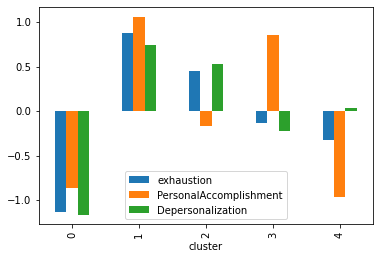

In [27]:
x=x[['exhaustion','PersonalAccomplishment','Depersonalization']]
x.plot(kind = "bar")

In [28]:
final_df_cluster.groupby('cluster').median()

,index,skillDevelopment,salaryBenefits,workLifeBalance,workSatisfaction,jobSecurity,careerGrowth,companyCulture,exhaustion,Depersonalization,PersonalAccomplishment
cluster,,,,,,,,,,,
0,49217.0,3.0,2.0,3.0,2.0,4.0,2.0,3.0,-1.126969,-1.015002,-0.824463
1,50534.5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.010825,0.886274,1.389865
2,42973.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,0.410772,0.526645,-0.088406
3,55073.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,-0.083680,-0.142478,0.666554
4,42601.0,4.0,2.0,4.0,3.0,5.0,3.0,4.0,-0.277342,0.046367,-0.833159


In [29]:
data_final=data.merge(final_df_cluster[['index', 'exhaustion', 'Depersonalization', 'PersonalAccomplishment', 'cluster']],on='index',how='left')


In [30]:
data_final.to_csv(r'C:\Users\bhava\OneDrive\Documents\AMPBA\Capstone\Reviews\Intermediate Files\combinedReviewsClustered.csv')

In [31]:
def read_article(file_name):
    # file = open(file_name, "r")
    # filedata = file.readlines()
    # article = filedata[0].split(". ")
    article=file_name.split(". ")
    sentences = []

    for sentence in article:
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    #sentences.pop() 
    
    return sentences

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix


def generate_summary(file_name, top_n=5):
    nltk.download("stopwords")
    stop_words = stopwords.words('english')
    summarize_text = []
    summarize_text_list=[]

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)
    #sentences =  file_name

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    #print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))
      summarize_text_list.append(ranked_sentence[i][1])

    # Step 5 - Offcourse, output the summarize text
    print("Summarized Text: \n", ".\n ".join(summarize_text))

In [32]:
def compile_text(df,text_column):
    compiled_text=''
    for text in df[text_column].fillna('NA.'):
        if text!='NA.':
             compiled_text=compiled_text+' '+text
    return compiled_text


In [33]:
compiled_text=compile_text(data_final[:100],'pros')
generate_summary( compiled_text,5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Summarized Text: 
 company policies are good , appraisals are fair and they give good salary hike and bonus every year Management is good work life balance is good.
 Work Culture is very good.
 Overall good Company to work with.
 Job security and work life balance will be awesome job security is good with HCL technologies.
 Good work environment and culture


In [34]:
def clean_location(location_name):
    for loc in major_locations:
        ind=-1
        if location_name.find(loc)!=-1:
            ind=location_name.find(loc)
            return loc
    if ind==-1:
        return location_name

In [35]:
def extract_location(jobFunction):
    try:
        loc=jobFunction.split(' for ')[1].split(' in ')[1]
        return loc
    except:
        return 'Not Specified'

In [36]:
major_locations_df=pd.read_csv(r'C:\Users\bhava\Downloads\Re__Capstone_Project__Preliminary_Discussion\Reviews\Mapping Files\Major Locations.csv')
locations_mapping_df=pd.read_csv(r'C:\Users\bhava\Downloads\Re__Capstone_Project__Preliminary_Discussion\Reviews\Mapping Files\Location Mapping.csv')

In [37]:
#List of Major Locations
major_locations=major_locations_df['Major Locations'].to_list()
#Dictionary of Locations to be mapped
location_mapping=locations_mapping_df.set_index('Original Value')['Mapped Value'].to_dict()

In [38]:
#Extracting Expirience and Location from jobFunction column
data_final['extract_location']=data_final['jobFunction'].apply(lambda x:extract_location(x))
#Imputing Blanks in Location column with data extracted from jobFunction, if available
data_final['cleaned_location']=np.where(data_final['location'].isna(),data_final['extract_location'],data_final['location'])
#Imputing unknown locations with Not Specified
data_final['cleaned_location']=data_final['cleaned_location'].fillna('Not Specified')
#Extracting location city from location columns
data_final['cleaned_location']=data_final['cleaned_location'].apply(lambda x:clean_location(str(x)))
#Harmonizing Locations
data_final['cleaned_location']=data_final['cleaned_location'].map(location_mapping)
#Bucketing all last 10% of the locations into 'Others'
major_locations.append('Not Specified')
data_final['cleaned_location']=np.where(data_final['cleaned_location'].isin(major_locations),data_final['cleaned_location'],'Others')

In [39]:
pd.DataFrame(data_final.groupby(['company','cleaned_location','cluster']).size()).to_excel('companyloc_combo v2.xlsx')

In [42]:
data_final.to_excel(r'DataFinalClLoc.xlsx')

In [43]:
os.getcwd()

'c:\\Users\\bhava\\Downloads'